In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def scaleCheby(xs):
    aMin = np.min(xs)
    aMax = np.max(xs)
    aScale = (aMax - aMin) / 2
    aCenter = (aMax + aMin) / 2
    s = (xs - aCenter) / aScale
    return s
cb = np.polynomial.chebyshev.Chebyshev.basis
cbs = [cb(i) for i in range(20)]

In [4]:
m_values = {}

In [7]:
df = pd.read_csv("../../datasets/occupancy_2.csv")
xs = df["CO2"]
s = scaleCheby(xs)

In [8]:
m1 = np.array([
    1.0, -0.666051658913382, 0.16713195302090914, 0.04413760158616875, -0.11480241038569126, 0.16868994168208465, -0.16386383544588368, 0.14770602452971462, -0.19778963010114933, 0.1880053024528279, -0.1310744859688147, 0.12408680557341276, -0.12668482349852123, 0.0877244780613798, -0.08470387132910845, 0.13940774606584286, -0.12201012218958093, 0.06585427766615083, -0.02804396793478194, -0.007641483651988701
])
m2 = np.array([np.mean(cbs[i](s)) for i in range(20)])
m_values["occupancy"] = (m1, m2)

In [10]:
df = pd.read_csv("../../datasets/hepmass_l.csv")
xs = df["f0"]
s = scaleCheby(xs)

In [11]:
m1 = np.array([1.0, -0.376260058257404, -0.5159003770852825, 0.4995669708398453, 0.0035116609075931567, -0.1754729249161065, 0.055577149729426775, 0.031124058810784703, -0.03523320835463064, 0.010992501345933903, 0.007710836996234599, -0.0036627326819612866, -0.005318099336181368, 0.0036316292570204964, 1.334992584500994E-4, 2.0938460272834414E-4, -0.0023187987602778844, 0.0028581787716093518, -3.6408890642438617E-4, -0.0019682254384358723])
m2 = np.array([np.mean(cbs[i](s)) for i in range(20)])
m_values["hepmass"] = (m1, m2)

In [12]:
datasets = ["hepmass", "occupancy"]

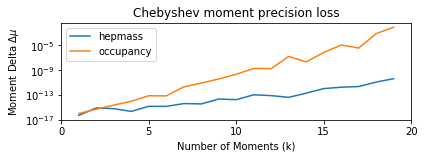

In [13]:
f = plt.figure(figsize=(6,2.3))
ax = f.gca()
for di in range(len(datasets)):
    dname = datasets[di]
    m1,m2 = m_values[dname]
    ax.semilogy(np.abs((m1-m2)), label=dname)
    ax.set_xlim(0,20)
    _ = ax.set_xticks(np.arange(0,21,5))
    ax.set_ylabel("Moment Delta $\Delta\mu$")
    ax.set_xlabel("Number of Moments (k)")
    ax.set_title("Chebyshev moment precision loss")
ax.legend()
f.tight_layout()
f.savefig("cheby_loss.pdf")